# Just operation policies of Guadalajara’s Aquapheric under drought conditions

## 2. Optimization Formulations

This notebook is designed to find the optimization formulations that can ensure that the optimal policies for the diversity of justice principle combinations can be found by filtering the pareto set. In other words, what a priori formulation can ensure an adecuate a posteriori implementation of the Distributive Justice 


In [55]:
from ema_workbench import (Model, RealParameter, ScalarOutcome,
                           MultiprocessingEvaluator, ema_logging,
                           Constant, Scenario, Constraint,optimize)

import random
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

from AMG_function import AMG_model_function, AMG_model_function_int
from functions_data import full_dataframe
from AMG_drought_indicator import get_drought_state

#testing the model function
outcomes = AMG_model_function(chapala_flow= 7.1, calderon_lared_flow= 0, pozos_flow= 2.2, toluquilla_flow= 0.4, 
                aqp1_PP2_to_PP3=0.2, aqp2_PP3_to_Pozos=-0.71, aqp3_Pozos_to_Toluquilla=-0.6, aqp4_Toluquilla_to_PP1=-0.6,
                rounding_outcomes=2,
                rounding_levers=2)
print(outcomes)


{'delivered_PP1': 5.751, 'delivered_PP2': 1.349, 'delivered_PP3': 0, 'delivered_Pozos': 2.2, 'delivered_Toluquilla': 0.4, 'demand_PP1': 2.932923333333333, 'demand_PP2': 0.7571686458333333, 'demand_PP3': 0.9435108680555555, 'demand_Toluquilla': 0.782294375, 'demand_Pozos': 1.2014250347222222, 'supplied_PP1': 2.6693019600000003, 'supplied_PP2': 0.6854705, 'supplied_PP3': 0.8775000000000001, 'supplied_Toluquilla': 0.68757754, 'supplied_Pozos': 1.0439000000000003, 'total_supplied': 5.963750000000001, 'supplied_demand_PP1': 0.9101165140127543, 'supplied_demand_PP2': 0.9053075609669191, 'supplied_demand_PP3': 0.9300369817768028, 'supplied_demand_Toluquilla': 0.8789243051888237, 'supplied_demand_Pozos': 0.8688848407769005, 'supplied_demand_deficit_PP1': 0.08988348598724571, 'supplied_demand_deficit_PP2': 0.09469243903308089, 'supplied_demand_deficit_PP3': 0.06996301822319717, 'supplied_demand_deficit_Toluquilla': 0.1210756948111763, 'supplied_demand_deficit_Pozos': 0.13111515922309946, 'suppl

# 1. Testing global maxima prescence


This section is focused on finding what problem formulation (set of objectives) can ensure that the optimization algorithm can find the best policy for the different proposed objectives in a posteriori approach (filtering the parteto front).

## 1.1 Open Exploration of Ad-Hoc Formulations

In [56]:
#Problem formulation
performance_outcomes = {"supplied_demand_deficit":True,
                          "supplied_demand":False,
                          "supply_percapita":False}

justice_outcomes = {"supplied_demand_GINI":False,
                      "supply_percapita_GINI":False,
                      "supply_percapita_average":False,
                      "ZAs_below_142":False,
                      "ZAs_below_128":False,
                      "ZAs_below_100":False,
                      "ZAs_below_50":False}

other_outcomes = {"energy_costs":False}


#Model Parameters
n_nfe = 10000
epsilon = 0.4
seed = 1

#Scenario setting
drougth_multiplier = 0.5
scenario_drought_multiplier = {"name":f"drought_multiplier_{drougth_multiplier}",'chapala_flow' : 6.9*drougth_multiplier, 'calderon_lared_flow' : 1*drougth_multiplier, 'pozos_flow' : 2.3*drougth_multiplier, 'toluquilla_flow' : 0.5*drougth_multiplier}

representative_scenarios_df = pd.read_csv("results/representative_scenarios.csv", index_col=0)

scenario_name = "chapala_incident"
scenario = representative_scenarios_df.loc[scenario_name,:].to_dict()


all_outcomes = {**performance_outcomes, **justice_outcomes, **other_outcomes}
current_formulation = [outcome for outcome, active in all_outcomes.items() if active]

experiment_name = "-".join(current_formulation)+f" {scenario['name']}-{n_nfe}-{epsilon}-{seed}"
print(experiment_name)

supplied_demand_deficit chapala_incident-10000-0.4-1


In [4]:
scenario

{'chapala_flow': 1.8,
 'calderon_lared_flow': 1.0,
 'pozos_flow': 2.2,
 'toluquilla_flow': 0.4,
 'name': 'chapala_incident'}

In [6]:
from AMG_optimization import run_optimization, run_optimization_int




# Model Parameters
n_nfe = 10000
epsilon = 0.04
seed = 1
flows = ["chapala_flow", "calderon_lared_flow", "pozos_flow", "toluquilla_flow"]


'''results  = run_optimization_old(experiment_name=experiment_name, 
                                justice_outcomes=justice_outcomes, performance_outcomes=performance_outcomes, other_outcomes=other_outcomes,
                 n_nfe = n_nfe, epsilon = epsilon, seed = seed,
                 scenario=scenario, model_function= AMG_model_function_old,
                 restriction = True)'''

results  = run_optimization(experiment_name=experiment_name, 
                 outcomes= all_outcomes,
                 n_nfe = n_nfe, epsilon = epsilon, seed = seed,
                 scenario=scenario, scenario_name=scenario_name,model_function= AMG_model_function,
                 restriction = True)

results.head()

Scenario({'chapala_flow': 1.8, 'calderon_lared_flow': 1.0, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit']


[MainProcess/INFO] pool started with 8 workers
11774it [00:52, 223.28it/s]                                                    
[MainProcess/INFO] optimization completed, found 716 solutions
[MainProcess/INFO] terminating pool


,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,aqp4_Toluquilla_to_PP1,supplied_demand_deficit_PP1,supplied_demand_deficit_PP2,supplied_demand_deficit_PP3,supplied_demand_deficit_Toluquilla,supplied_demand_deficit_Pozos,experiment_name,seed,duration,scenario
0,-0.830640,-0.660612,-0.089012,-0.574064,0.862780,0.013886,0.173320,0.116130,0.380852,supplied_demand_deficit chapala_incident-10000...,1,54.0,chapala_incident
1,-0.836513,-0.466553,-0.109232,0.128894,0.706989,0.008843,0.311057,0.717010,0.264922,supplied_demand_deficit chapala_incident-10000...,1,54.0,chapala_incident
2,-0.749742,-0.481774,-0.171066,-0.204405,0.780855,0.083333,0.240792,0.491452,0.239703,supplied_demand_deficit chapala_incident-10000...,1,54.0,chapala_incident
3,-0.691768,0.025318,-0.075514,0.453602,0.635027,0.133102,0.550197,0.958790,0.017050,supplied_demand_deficit chapala_incident-10000...,1,54.0,chapala_incident
4,-0.778625,-0.574333,-0.109232,0.162485,0.699545,0.058538,0.196925,0.744920,0.323233,supplied_demand_deficit chapala_incident-10000...,1,54.0,chapala_incident


## 3. Run Optimizations with Different Formulations

In [2]:
formulations = pd.read_excel("2_formulation\optimization_parameters.xlsx", index_col="experiment_name")
formulations.head(50)

,supplied_demand_deficit,supplied_demand,supply_percapita,supplied_demand_GINI,supply_percapita_GINI,average_supply_percapita,ZAs_below_142,ZAs_below_128,ZAs_below_100,ZAs_below_50,...,epsilon,seed,scenario_name,scenario_chapala_flow,scenario_calderon_lared_flow,scenario_pozos_flow,scenario_toluquilla_flow,restriction,model_function,Rationale
experiment_name,,,,,,,,,,,,,,,,,,,,,
Supplied Demand Deficit,True,False,False,False,False,False,False,False,False,False,...,0.01,1,2020_baseline,1,1,1,1,True,AMG_model_function,NaN
"Sup. Dem. Deficit, Energy & Sup. PerCap. GINI",True,False,False,False,True,False,False,False,False,False,...,0.01,1,2020_baseline,1,1,1,1,True,AMG_model_function,NaN
Sup. Dem. Deficit & All Justice,True,False,False,True,True,True,False,False,False,False,...,0.01,1,2020_baseline,1,1,1,1,True,AMG_model_function,NaN


In [3]:
representative_scenarios_df = pd.read_csv("results/representative_scenarios.csv", index_col=0)
representative_scenarios_df.head()

,chapala_flow,calderon_lared_flow,pozos_flow,toluquilla_flow,name
2021_drought,7.1,0.0,2.2,0.4,2021_drought
chapala_incident,1.8,1.0,2.2,0.4,chapala_incident
groundwater_scarcity,6.9,1.0,0.7,0.2,groundwater_scarcity
NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
from AMG_optimization import run_optimization

outcomes_vars =["supplied_demand_deficit","supplied_demand","supply_percapita",
        "supplied_demand_GINI","supply_percapita_GINI","average_supply_percapita",
        "ZAs_below_142","ZAs_below_128","ZAs_below_100","ZAs_below_50",
        "energy_costs"]

aqp_flows = ["aqp1_PP2_to_PP3", "aqp2_PP3_to_Pozos", "aqp3_Pozos_to_Toluquilla", "aqp4_Toluquilla_to_PP1"]

# Model Parameters
n_nfe = 20000
epsilon = 0.04
seed = 1

# Define scenario from the representative scenarios df
representative_scenarios = ["2021_drought", "chapala_incident", "groundwater_scarcity"]
representative_scenarios_df = pd.read_csv("results/representative_scenarios.csv", index_col=0)

for scenario_name in representative_scenarios:

    scenario = representative_scenarios_df.loc[scenario_name,:].to_dict()

    # Empty df to concat all results from the optimizations 
    full_optimization_results = pd.DataFrame()

    for experiment_name, formulation in formulations.iterrows():
        results = run_optimization(experiment_name=experiment_name, 
                                            outcomes = formulation[outcomes_vars].to_dict(),
                                            scenario=scenario,
                                            scenario_name = scenario_name,
                                            rounding_levers=3,
                                            n_nfe = n_nfe,
                                            epsilon = epsilon,
                                            seed=seed)

        

        # Remove outcomes
        results = results.loc[:,aqp_flows+["experiment_name", "scenario", "seed", "duration"]]
        full_results_df = full_dataframe(results,scenarios_in_dataframe=False, scenario = scenario)

        # Adding some information columns not usually included in the full_dataframe function
        full_results_df = pd.concat([full_results_df, results[["scenario", "seed", "duration"]]], axis = 1)
        
        full_optimization_results = pd.concat([full_results_df,full_optimization_results])



    # Change index from individual optimization runs and use it to define policies
    full_optimization_results = full_optimization_results.reset_index()
    full_optimization_results = full_optimization_results.rename(columns={"index":"policy"})


    full_optimization_results.to_csv(f"results/optimization_results_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.csv",index=False)

full_optimization_results.head()


Scenario({'chapala_flow': 7.1, 'calderon_lared_flow': 0.0, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit']


[MainProcess/INFO] pool started with 8 workers
20242it [02:05, 161.25it/s]                                                    
[MainProcess/INFO] optimization completed, found 353 solutions
[MainProcess/INFO] terminating pool


Scenario({'chapala_flow': 7.1, 'calderon_lared_flow': 0.0, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit', 'supply_percapita_GINI', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
21530it [03:57, 90.71it/s]                                                     
[MainProcess/INFO] optimization completed, found 1051 solutions
[MainProcess/INFO] terminating pool


Scenario({'chapala_flow': 7.1, 'calderon_lared_flow': 0.0, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit', 'supplied_demand_GINI', 'supply_percapita_GINI', 'average_supply_percapita', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
21750it [04:01, 90.03it/s]                                                     
[MainProcess/INFO] optimization completed, found 1130 solutions
[MainProcess/INFO] terminating pool


Scenario({'chapala_flow': 1.8, 'calderon_lared_flow': 1.0, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit']


[MainProcess/INFO] pool started with 8 workers
22072it [05:37, 65.40it/s]                                                     
[MainProcess/INFO] optimization completed, found 1561 solutions
[MainProcess/INFO] terminating pool


Scenario({'chapala_flow': 1.8, 'calderon_lared_flow': 1.0, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit', 'supply_percapita_GINI', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
20343it [06:12, 54.64it/s]                                                     
[MainProcess/INFO] optimization completed, found 1869 solutions
[MainProcess/INFO] terminating pool


Scenario({'chapala_flow': 1.8, 'calderon_lared_flow': 1.0, 'pozos_flow': 2.2, 'toluquilla_flow': 0.4})
['supplied_demand_deficit', 'supplied_demand_GINI', 'supply_percapita_GINI', 'average_supply_percapita', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
21993it [06:51, 53.46it/s]                                                     
[MainProcess/INFO] optimization completed, found 2133 solutions
[MainProcess/INFO] terminating pool


Scenario({'chapala_flow': 6.9, 'calderon_lared_flow': 1.0, 'pozos_flow': 0.7, 'toluquilla_flow': 0.2})
['supplied_demand_deficit']


[MainProcess/INFO] pool started with 8 workers
22103it [14:29, 25.43it/s]                                                     
[MainProcess/INFO] optimization completed, found 1938 solutions
[MainProcess/INFO] terminating pool


Scenario({'chapala_flow': 6.9, 'calderon_lared_flow': 1.0, 'pozos_flow': 0.7, 'toluquilla_flow': 0.2})
['supplied_demand_deficit', 'supply_percapita_GINI', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
23556it [18:00, 21.80it/s]                                                     
[MainProcess/INFO] optimization completed, found 2519 solutions
[MainProcess/INFO] terminating pool


Scenario({'chapala_flow': 6.9, 'calderon_lared_flow': 1.0, 'pozos_flow': 0.7, 'toluquilla_flow': 0.2})
['supplied_demand_deficit', 'supplied_demand_GINI', 'supply_percapita_GINI', 'average_supply_percapita', 'energy_costs']


[MainProcess/INFO] pool started with 8 workers
20033it [06:12, 53.84it/s]                                                     
[MainProcess/INFO] optimization completed, found 2179 solutions
[MainProcess/INFO] terminating pool


,policy,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,delivered_PP1,delivered_PP2,delivered_PP3,delivered_Pozos,delivered_Toluquilla,...,supplied_demand_GINI,energy_costs,ZAs_below_142,ZAs_below_100,ZAs_below_50,ZAs_below_128,experiment_name,scenario,seed,duration
0,0,-0.155786,0.442969,0.422384,-0.063559,5.589,1.311,1.0,0.7,0.2,...,0.100792,0.271174,4.0,2.0,0.0,4.0,Sup. Dem. Deficit & All Justice,groundwater_scarcity,1,374.0
1,1,-0.306138,0.408046,0.017747,-0.622031,5.589,1.311,1.0,0.7,0.2,...,0.158681,0.338491,3.0,2.0,0.0,3.0,Sup. Dem. Deficit & All Justice,groundwater_scarcity,1,374.0
2,2,-0.263784,0.518232,0.200418,-0.158868,5.589,1.311,1.0,0.7,0.2,...,0.136292,0.285325,3.0,2.0,0.0,3.0,Sup. Dem. Deficit & All Justice,groundwater_scarcity,1,374.0
3,3,-0.874070,0.193141,-0.100311,-0.686719,5.589,1.311,1.0,0.7,0.2,...,0.069794,0.463560,4.0,1.0,0.0,2.0,Sup. Dem. Deficit & All Justice,groundwater_scarcity,1,374.0
4,4,-0.123366,0.057403,0.001799,-0.351160,5.589,1.311,1.0,0.7,0.2,...,0.161815,0.133432,3.0,2.0,0.0,3.0,Sup. Dem. Deficit & All Justice,groundwater_scarcity,1,374.0


In [15]:
from functions_data import find_minmax_values
representative_scenarios = ["2021_drought", "chapala_incident", "groundwater_scarcity"]

combined_optimization_results = pd.DataFrame()
for scenario_name in representative_scenarios:
    full_optimization_results = pd.read_csv(f"results/optimization_results_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.csv")
    combined_optimization_results = pd.concat([full_optimization_results,combined_optimization_results])
    # Finds the maximum or minimum value for each objective for each formulation
    min_max_df = find_minmax_values(full_optimization_results)
    min_max_df.to_csv(f"results/min_max_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.csv" )

combined_optimization_results.to_csv(f"results/optimization_results_sd{seed}ep{epsilon}nfe{n_nfe}.csv", index=False)

min_max_df.head()



,supplied_demand_deficit_PP1,supplied_demand_deficit_PP2,supplied_demand_deficit_PP3,supplied_demand_deficit_Toluquilla,supplied_demand_deficit_Pozos,supplied_demand_GINI,supply_percapita_GINI,ZAs_below_142,ZAs_below_100,ZAs_below_50,energy_costs,supplied_demand_PP1,supplied_demand_PP2,supplied_demand_PP3,supplied_demand_Toluquilla,supplied_demand_Pozos,supply_percapita_average,comp_energy_costs,comp_supply_percapita_GINI
formulation,,,,,,,,,,,,,,,,,,,
Sup. Dem. Deficit & All Justice,0.000012,0.000051,0.000050,0.000180,0.000060,0.012679,0.013176,1.0,0.0,0.0,0.023781,1.073049,1.500087,1.119946,1.128902,1.051511,128.332203,0.228755,0.112409
"Sup. Dem. Deficit, Energy & Sup. PerCap. GINI",0.000022,0.000025,0.000089,0.000010,0.000082,0.006677,0.014545,1.0,0.0,0.0,0.033633,1.055121,1.163354,1.071588,1.278664,1.056970,129.834166,0.604833,0.185597
Supplied Demand Deficit,0.000061,0.000102,0.000048,0.000061,0.000076,0.019024,0.027862,1.0,0.0,0.0,0.099789,1.017902,1.173289,1.076487,1.114155,1.048039,127.428093,0.612133,0.084659


supplied_demand_deficit_PP1             0.000003
supplied_demand_deficit_PP2             0.000043
supplied_demand_deficit_PP3             0.000035
supplied_demand_deficit_Toluquilla      0.000010
supplied_demand_deficit_Pozos           0.000004
supplied_demand_GINI                    0.009746
supply_percapita_GINI                   0.004963
ZAs_below_142                           1.000000
ZAs_below_100                           0.000000
ZAs_below_50                            0.000000
energy_costs                            0.026973
supplied_demand_PP1                     1.085381
supplied_demand_PP2                     1.071572
supplied_demand_PP3                     1.069800
supplied_demand_Toluquilla              1.183116
supplied_demand_Pozos                   1.046577
supply_percapita_average              141.583346
comp_energy_costs                       0.159493
comp_supply_percapita_GINI              0.076024
Name: Sup. Dem. Deficit & All Justice, dtype: float64
supplied_demand

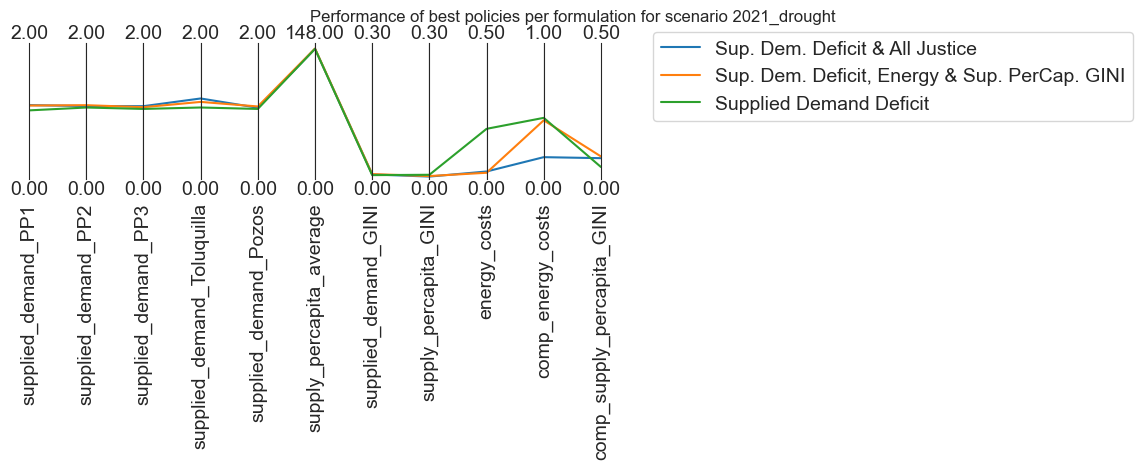

supplied_demand_deficit_PP1             0.609102
supplied_demand_deficit_PP2             0.000023
supplied_demand_deficit_PP3             0.000045
supplied_demand_deficit_Toluquilla      0.000077
supplied_demand_deficit_Pozos           0.000090
supplied_demand_GINI                    0.148118
supply_percapita_GINI                   0.142270
ZAs_below_142                           2.000000
ZAs_below_100                           1.000000
ZAs_below_50                            1.000000
energy_costs                            0.016727
supplied_demand_PP1                     0.390898
supplied_demand_PP2                     1.121239
supplied_demand_PP3                     1.235766
supplied_demand_Toluquilla              1.163927
supplied_demand_Pozos                   1.292879
supply_percapita_average              108.997804
comp_energy_costs                       0.177770
comp_supply_percapita_GINI              0.173942
Name: Sup. Dem. Deficit & All Justice, dtype: float64
supplied_demand

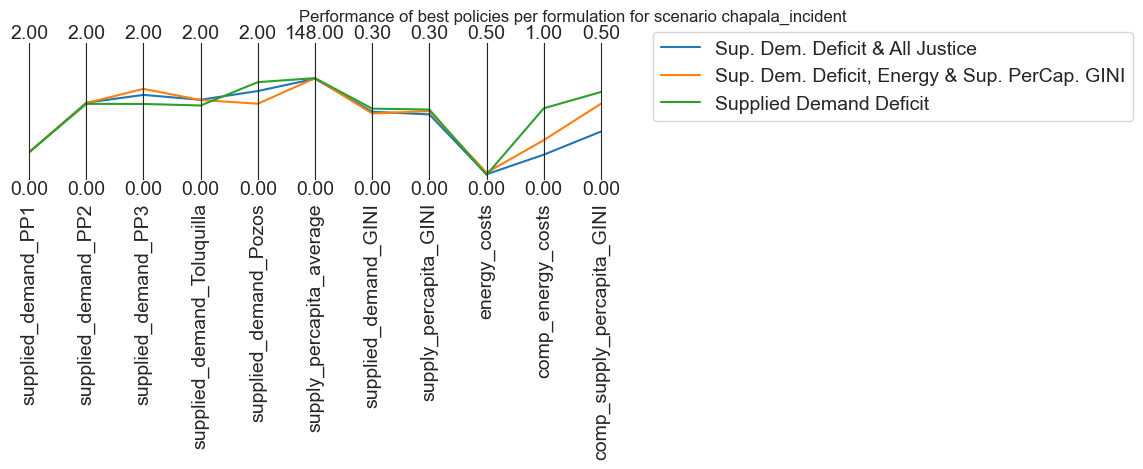

supplied_demand_deficit_PP1             0.000012
supplied_demand_deficit_PP2             0.000051
supplied_demand_deficit_PP3             0.000050
supplied_demand_deficit_Toluquilla      0.000180
supplied_demand_deficit_Pozos           0.000060
supplied_demand_GINI                    0.012679
supply_percapita_GINI                   0.013176
ZAs_below_142                           1.000000
ZAs_below_100                           0.000000
ZAs_below_50                            0.000000
energy_costs                            0.023781
supplied_demand_PP1                     1.073049
supplied_demand_PP2                     1.500087
supplied_demand_PP3                     1.119946
supplied_demand_Toluquilla              1.128902
supplied_demand_Pozos                   1.051511
supply_percapita_average              128.332203
comp_energy_costs                       0.228755
comp_supply_percapita_GINI              0.112409
Name: Sup. Dem. Deficit & All Justice, dtype: float64
supplied_demand

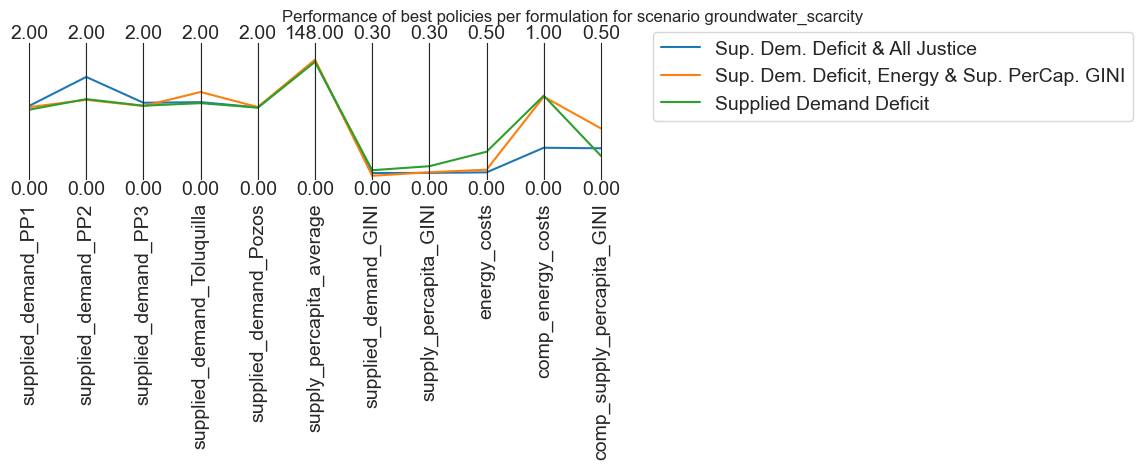

In [12]:
from ema_workbench.analysis import parcoords

# Load your data and limits (replace with your actual data and limits)

representative_scenarios = ["2021_drought", "chapala_incident", "groundwater_scarcity"]

# Model Parameters
n_nfe = 20000
epsilon = 0.04
seed = 1

for scenario_name in representative_scenarios:

    data = pd.read_csv(f"results/min_max_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.csv", index_col="formulation")

    limits = pd.read_csv("2_formulation/limits.csv")

    # Replace underscores with spaces in column names
    #limits.columns = limits.columns.str.replace('_', ' ')

    # Create parallel axes plot
    paraxes = parcoords.ParallelAxes(limits)
    colors = sns.color_palette()
    # Plot each row of data
    for i, (index, row) in enumerate(data.iterrows()):
        print(row)
        paraxes.plot(row.to_frame().T, label=str(index), color=colors[i])

    # Customize the plot
    plt.title(f'Performance of best policies per formulation for scenario {scenario_name}')
    paraxes.legend()

    # Adjust tick labels
    for ax in paraxes.axes:
        # Remove the unnecessary decimal places
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
        
        # Add percentage symbol to tick labels (excluding GINI columns)
        if 'GINI' not in ax.get_ylabel():
            ax.set_yticklabels([f'{int(tick * 100)}%' for tick in ax.get_yticks()])

    # Save the figure
    plt.savefig("2_formulation/best_pols_comp_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.jpg", dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()


In [51]:
from functions_data import find_best_policies_for_specified_objectives, 

# Example usage
objectives_dict = {
    'supplied_demand_deficit_PP1': False,
    'supplied_demand_deficit_PP2': False,
    'supplied_demand_deficit_PP3': False,
    'supplied_demand_deficit_Toluquilla': False,
    'supplied_demand_deficit_Pozos': False,
    'supplied_demand_GINI': True,
    'supply_percapita_GINI': False,
    'energy_costs': True,
    'supplied_demand_PP1': False,
    'supplied_demand_PP2': False,
    'supplied_demand_PP3': False,
    'supplied_demand_Toluquilla': False,
    'supplied_demand_Pozos': False,
    'supply_percapita_average': False
}

scenario_name = "chapala_incident"
seed = 1  # Example seed value
epsilon = 0.04  # Example epsilon value
n_nfe = 20000  # Example nfe value

full_optimization_results = pd.read_csv(f"results/optimization_results_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.csv", index_col="policy")
full_optimization_results = full_optimization_results.loc[full_optimization_results["experiment_name"] == "Sup. Dem. Deficit, Energy & Sup. PerCap. GINI"]

best_policies_df = find_best_policies_for_specified_objectives(full_optimization_results, objectives_dict)

best_policies_df.to_csv(f"results/best_policies_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.csv", index=False)
best_policies_df.tail()



Compromise index = 1838


,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,delivered_PP1,delivered_PP2,delivered_PP3,delivered_Pozos,delivered_Toluquilla,demand_PP1,...,ZAs_below_50,ZAs_below_128,experiment_name,scenario,seed,duration,supplied_demand_GINI_min,supplied_demand_GINI_compromise,energy_costs_min,energy_costs_compromise
policy,,,,,,,,,,,,,,,,,,,,,
1864,-0.493519,-0.247729,-0.362225,-0.113487,1.458,0.342,1.0,2.2,0.4,2.932923,...,1.0,4.0,"Sup. Dem. Deficit, Energy & Sup. PerCap. GINI",chapala_incident,1,375.0,False,False,False,False
1865,-0.856571,-0.099801,-0.207364,-0.186143,1.458,0.342,1.0,2.2,0.4,2.932923,...,1.0,2.0,"Sup. Dem. Deficit, Energy & Sup. PerCap. GINI",chapala_incident,1,375.0,False,False,False,False
1866,0.038029,-0.719287,-0.137514,-0.001582,1.458,0.342,1.0,2.2,0.4,2.932923,...,1.0,4.0,"Sup. Dem. Deficit, Energy & Sup. PerCap. GINI",chapala_incident,1,375.0,False,False,False,False
1867,-0.380436,-0.371927,-0.313693,-0.003989,1.458,0.342,1.0,2.2,0.4,2.932923,...,1.0,4.0,"Sup. Dem. Deficit, Energy & Sup. PerCap. GINI",chapala_incident,1,375.0,False,False,False,False
1868,0.030407,-0.696173,-0.428185,-0.197468,1.458,0.342,1.0,2.2,0.4,2.932923,...,2.0,5.0,"Sup. Dem. Deficit, Energy & Sup. PerCap. GINI",chapala_incident,1,375.0,False,False,False,False


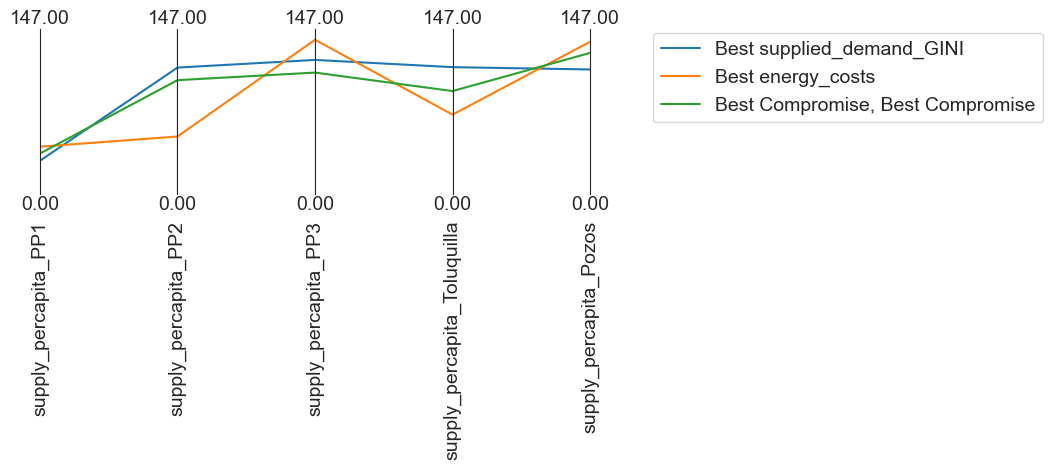

In [54]:
import pandas as pd
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt

def visualize_best_policies(best_policies_df, objectives_dict):
    ZA_names = ["PP1", "PP2", "PP3", "Toluquilla", "Pozos"]

    # Identify the columns that indicate best performance (ending in '_min', '_max', or '_compromise')
    objectives_min = ['supplied_demand_deficit_PP1',
                      'supplied_demand_deficit_PP2', 
                      'supplied_demand_deficit_PP3',
                      'supplied_demand_deficit_Toluquilla', 
                      'supplied_demand_deficit_Pozos',
                      "supplied_demand_GINI",
                      "supply_percapita_GINI",
                      "energy_costs"]

    objectives_max = ['supplied_demand_PP1', 
                      'supplied_demand_PP2', 
                      'supplied_demand_PP3',
                      'supplied_demand_Toluquilla', 
                      'supplied_demand_Pozos', 
                      "supply_percapita_average"]
    
    best_performance_columns = []
    for obj in objectives_dict.keys():
        if objectives_dict[obj]:
            if obj in objectives_min:
                best_performance_columns.append(f"{obj}_min")
            elif obj in objectives_max:
                best_performance_columns.append(f"{obj}_max")
            best_performance_columns.append(f"{obj}_compromise")

    # Create a dictionary for labeling the policies
    policy_labels = {
        f"{obj}_min": f"Best {obj}" for obj in objectives_dict.keys() if objectives_dict[obj] and obj in objectives_min
    }
    policy_labels.update({
        f"{obj}_max": f"Best {obj}" for obj in objectives_dict.keys() if objectives_dict[obj] and obj in objectives_max
    })
    policy_labels.update({
        f"{obj}_compromise": f"Best Compromise" for obj in objectives_dict.keys() if objectives_dict[obj]
    })

    # Filter rows where at least one of the best performance columns is True
    best_performing_policies_df = best_policies_df[best_policies_df[best_performance_columns].any(axis=1)]

    # Create a dictionary to map index to labels
    index_labels = {}
    for col, label in policy_labels.items():
        indices = best_performing_policies_df[best_performing_policies_df[col] == True].index
        for idx in indices:
            if idx in index_labels:
                index_labels[idx] += f", {label}"
            else:
                index_labels[idx] = label

    # Select the supply per capita columns for the five zones of analysis (ZA)
    supply_per_capita_columns = [
        'supply_percapita_PP1', 'supply_percapita_PP2', 'supply_percapita_PP3',
        'supply_percapita_Toluquilla', 'supply_percapita_Pozos'
    ]
    data = best_performing_policies_df[supply_per_capita_columns]

    # Get limits for parallel coordinates plot
    limits = pd.read_csv("results/limits.csv")

    # Create the parallel axes plot
    paraxes = parcoords.ParallelAxes(limits)

    # Plot each row
    colors = plt.cm.tab10.colors
    for i, (index, row) in enumerate(data.iterrows()):
        label = index_labels.get(index, str(index))
        paraxes.plot(row.to_frame().T, label=label, color=colors[i % len(colors)])

    # Add legend and show plot
    paraxes.legend()
    plt.show()

# Example usage
objectives_dict = {
    'supplied_demand_deficit_PP1': False,
    'supplied_demand_deficit_PP2': False,
    'supplied_demand_deficit_PP3': False,
    'supplied_demand_deficit_Toluquilla': False,
    'supplied_demand_deficit_Pozos': False,
    'supplied_demand_GINI': True,
    'supply_percapita_GINI': False,
    'energy_costs': True,
    'supplied_demand_PP1': False,
    'supplied_demand_PP2': False,
    'supplied_demand_PP3': False,
    'supplied_demand_Toluquilla': False,
    'supplied_demand_Pozos': False,
    'supply_percapita_average': False
}

scenario_name = "chapala_incident"
seed = 1  # Example seed value
epsilon = 0.04  # Example epsilon value
n_nfe = 20000  # Example nfe value

# Load the data from the provided CSV file
best_policies_df = pd.read_csv(f"results/best_policies_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.csv")

visualize_best_policies(best_policies_df)



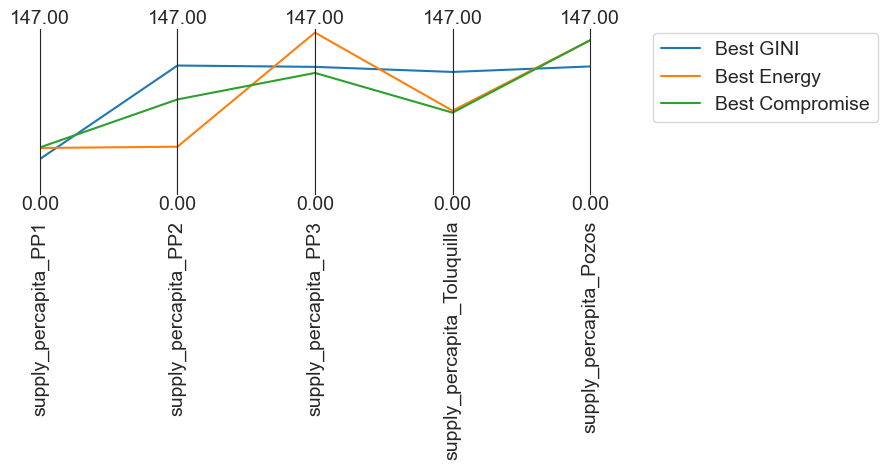

In [23]:
import pandas as pd
from ema_workbench.analysis import parcoords
import matplotlib.pyplot as plt

# Load the data from the provided CSV file (if not already loaded)
best_policies_df = pd.read_csv(f"results/filtering_test_{scenario_name}_sd{seed}ep{epsilon}nfe{n_nfe}.csv")
ZA_names = ["PP1", "PP2", "PP3", "Toluquilla", "Pozos"]

# Filter the DataFrame for the "Supplied Demand & All Justice Objectives" experiment
experiment_name = "Sup. Dem. Deficit & All Justice"
filtered_df = best_policies_df[best_policies_df['experiment_name'] == experiment_name]

# Identify the columns that indicate best performance (ending in '_min', '_max', or '_compromise')
best_performance_columns = ["energy_costs_min", "supply_percapita_GINI_min", "" "energy_costs_compromise"] 

# Create a dictionary for labeling the policies
policy_labels = {
    "energy_costs_min": "Best Energy",
    "supply_percapita_GINI_min": "Best GINI",
    "energy_costs_compromise": "Best Compromise",
    **{f"supplied_demand_{ZA}_max": f"Best {ZA}" for ZA in ZA_names}
}

# Filter rows where at least one of the best performance columns is True
best_performing_policies_df = filtered_df[filtered_df[best_performance_columns].any(axis=1)]

# Create a dictionary to map index to labels
index_labels = {}
for col, label in policy_labels.items():
    indices = best_performing_policies_df[best_performing_policies_df[col] == True].index
    for idx in indices:
        if idx in index_labels:
            index_labels[idx] += f", {label}"
        else:
            index_labels[idx] = label

# Select the supply per capita columns for the five zones of analysis (ZA)
supply_per_capita_columns = [
    'supply_percapita_PP1', 'supply_percapita_PP2', 'supply_percapita_PP3',
    'supply_percapita_Toluquilla', 'supply_percapita_Pozos'
]
data = best_performing_policies_df[supply_per_capita_columns]

# Get limits for parallel coordinates plot
limits = pd.read_csv("results/limits.csv")

# Create the parallel axes plot
paraxes = parcoords.ParallelAxes(limits)

# Plot each row
colors = plt.cm.tab10.colors
for i, (index, row) in enumerate(data.iterrows()):
    label = index_labels.get(index, str(index))
    paraxes.plot(row.to_frame().T, label=label, color=colors[i % len(colors)])

# Add legend and show plot
paraxes.legend()
plt.show()




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ZA_names = ["PP1", "PP2", "PP3", "Toluquilla", "Pozos"]

# Select columns for the DataFrame
full_optimization_results_df = pd.read_csv("results/filtering_test.csv")
dataframe = full_optimization_results_df[[f"supplied_demand_{ZA}" for ZA in ZA_names] + ["supplied_demand_GINI", "experiment_name"]]

# Create a DataFrame with the necessary columns
viz_data = dataframe.rename(columns=lambda x: x.split('_')[-1])

# Melt the DataFrame to long format for plotting
viz_data_melted = viz_data.melt(id_vars=['experiment_name'], var_name='Outcome')

# Create the clustered box plot with customized parameters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='value', hue='experiment_name', data=viz_data_melted, palette='Set2')
plt.title('Clustered Box Plot of Outcomes for {}'.format("title"))
plt.tight_layout()

# Show the plot
plt.savefig("experiment_results/experiments_boxplot.png")
plt.show()

KeyError: "The following 'id_vars' are not present in the DataFrame: ['experiment_name']"

In [ ]:
from functions_viz import violin_plot

results_plot = full_df[[f"supplied_demand_{ZA}" for ZA in ZA_names]+["supplied_demand_GINI"]]
violin_plot(results_plot,experiment_name, y_axis="Supplied demand")

ModuleNotFoundError: No module named 'viz_functions'

from viz_functions import parallel_axis_plot

parallel_axis_plot(results_plot)

In [ ]:
experiment_results = full_df


experiment_results.head()

,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,delivered_PP1,delivered_PP2,delivered_PP3,delivered_Toluquilla,delivered_Pozos,supplied_PP1,...,supply_percapita_average,min_supplied_demand,supply_percapita_GINI,supplied_demand_GINI,average_supply_percapita,energy_costs,ZAs_below_142,ZAs_below_100,ZAs_below_50,experiment
0,-0.431440,0.163298,-0.597881,-0.078320,5.751,1.349,0.0,0.4,2.2,2.778866,...,137.4,0.648,0.104221,0.103266,138.0,0.317735,3.0,1.0,0.0,SupDemDef_SupDemGINI_SupPercapGINI_Energy-2021...
1,-0.381440,0.811276,-0.308070,-0.371393,5.751,1.349,0.0,0.4,2.2,2.811366,...,130.0,0.381,0.152000,0.137022,138.0,0.468045,3.0,1.0,0.0,SupDemDef_SupDemGINI_SupPercapGINI_Energy-2021...
2,-0.617442,0.475436,-0.428132,-0.362303,5.751,1.349,0.0,0.4,2.2,2.657965,...,136.0,0.669,0.082353,0.078145,138.0,0.470828,2.0,1.0,0.0,SupDemDef_SupDemGINI_SupPercapGINI_Energy-2021...
3,-0.350342,0.471640,-0.460169,-0.143333,5.751,1.349,0.0,0.4,2.2,2.831580,...,133.6,0.672,0.093413,0.088018,138.0,0.356371,2.0,1.0,0.0,SupDemDef_SupDemGINI_SupPercapGINI_Energy-2021...
4,-0.328725,0.488656,-0.565736,-0.067127,5.751,1.349,0.0,0.4,2.2,2.845631,...,134.2,0.658,0.116841,0.113120,138.0,0.362561,2.0,2.0,0.0,SupDemDef_SupDemGINI_SupPercapGINI_Energy-2021...


In [ ]:
experiment_results = full_df.drop(full_df.index, inplace=False)
experiment_results.head()

,aqp4_Toluquilla_to_PP1,aqp1_PP2_to_PP3,aqp2_PP3_to_Pozos,aqp3_Pozos_to_Toluquilla,delivered_PP1,delivered_PP2,delivered_PP3,delivered_Toluquilla,delivered_Pozos,supplied_PP1,...,supply_percapita_average,min_supplied_demand,supply_percapita_GINI,supplied_demand_GINI,average_supply_percapita,energy_costs,ZAs_below_142,ZAs_below_100,ZAs_below_50,experiment


In [ ]:
experiments=["gini and supplied demand deficit minimization - 5k nfe.csv",
             "gini minimization and supply per capita maximization - 5k nfe.csv",
             "gini minimization and supplied demand maximization - 5k nfe.csv",
             "only GINI supplied demand optimization.csv"]

experiment_results = full_df.drop(full_df.index, inplace=False)

for experiment in experiments:
    df=pd.read_csv(f"experiment_results/{experiment}")
    print(df.columns[-6:])
    experiment_results=pd.concat([experiment_results,df])#

experiment_results.tail()

FileNotFoundError: [Errno 2] No such file or directory: 'experiment_results/gini and supplied demand deficit minimization - 5k nfe.csv'

In [ ]:
dataframe= experiment_results[[f"supplied_demand_{ZA}" for ZA in ZA_names]+["supplied_demand_GINI"]+["experiment"]]
dataframe.tail()

,supplied_demand_PP1,supplied_demand_PP2,supplied_demand_PP3,supplied_demand_Toluquilla,supplied_demand_Pozos,supplied_demand_GINI,experiment
1886,0.82384,0.92362,0.89705,2.45025,0.07073,0.376252,gini minimization and supplied demand maximiza...
1887,1.14300,0.56884,1.24756,1.22292,0.03908,0.290997,gini minimization and supplied demand maximiza...
1888,0.93574,0.38714,0.27807,1.91102,0.97287,0.343524,gini minimization and supplied demand maximiza...
1889,0.95059,1.09702,0.85189,0.72282,0.81227,0.079982,gini minimization and supplied demand maximiza...
0,0.89469,0.90960,0.90902,0.90732,0.90185,0.003272,only GINI supplied demand optimization


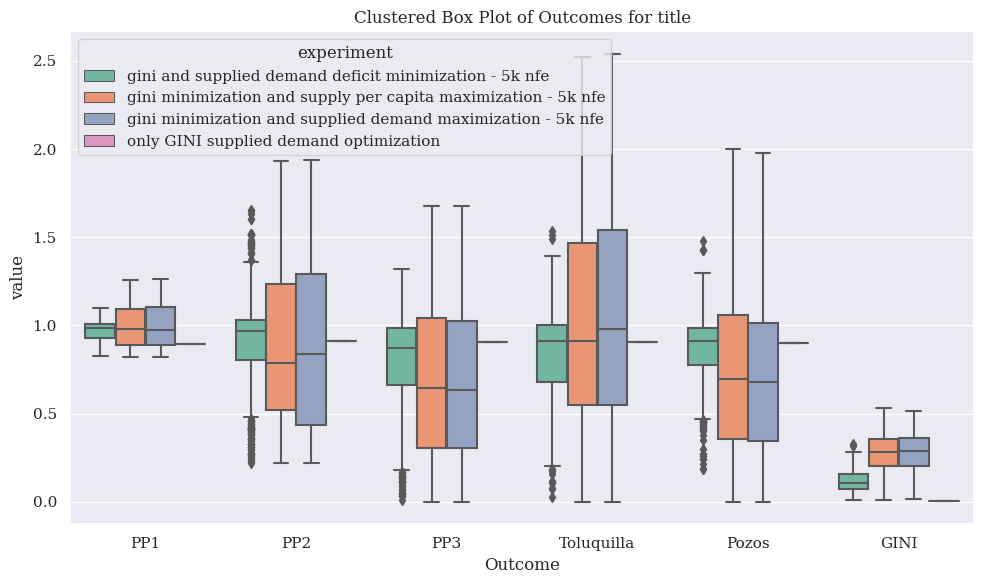

In [ ]:
from viz_functions import clustered_box_plot

clustered_box_plot(experiment_results)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1000x600 with 0 Axes>

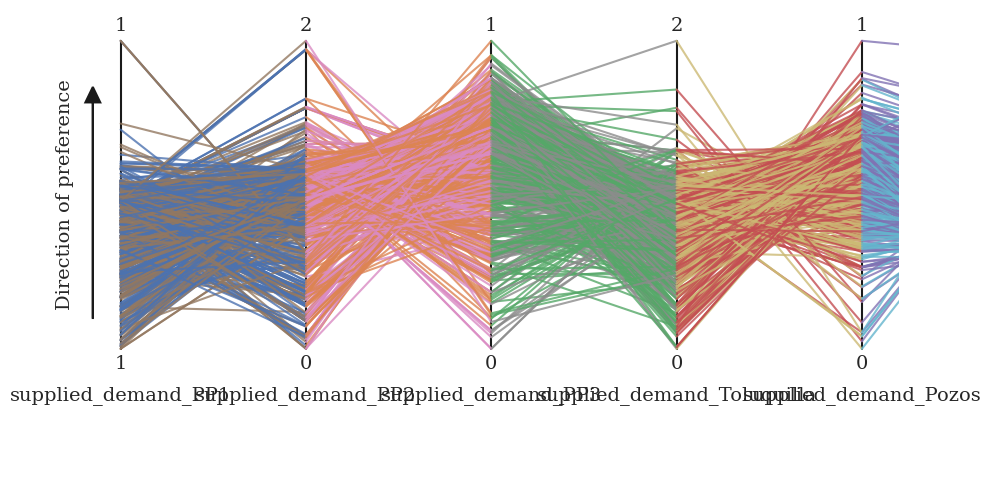

In [ ]:
### function to normalize data based on direction of preference and whether each objective is minimized or maximized
###   -> output dataframe will have values ranging from 0 (which maps to bottom of figure) to 1 (which maps to top)
def reorganize_objs(objs, columns_axes, ideal_direction, minmaxs):
    ### if min/max directions not given for each axis, assume all should be maximized
    if minmaxs is None:
        minmaxs = ['max']*len(columns_axes)
         
    ### get subset of dataframe columns that will be shown as parallel axes
    objs_reorg = objs[columns_axes]
     
    ### reorganize & normalize data to go from 0 (bottom of figure) to 1 (top of figure), 
    ### based on direction of preference for figure and individual axes
    if ideal_direction == 'bottom':
        tops = objs_reorg.min(axis=0)
        bottoms = objs_reorg.max(axis=0)
        for i, minmax in enumerate(minmaxs):
            if minmax == 'max':
                objs_reorg.iloc[:, i] = (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i]) / \
                                        (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i].min(axis=0))
            else:
                bottoms[i], tops[i] = tops[i], bottoms[i]
                objs_reorg.iloc[:, -1] = (objs_reorg.iloc[:, -1] - objs_reorg.iloc[:, -1].min(axis=0)) / \
                                         (objs_reorg.iloc[:, -1].max(axis=0) - objs_reorg.iloc[:, -1].min(axis=0))
    elif ideal_direction == 'top':
        tops = objs_reorg.max(axis=0)
        bottoms = objs_reorg.min(axis=0)
        for i, minmax in enumerate(minmaxs):
            if minmax == 'max':
                objs_reorg.iloc[:, i] = (objs_reorg.iloc[:, i] - objs_reorg.iloc[:, i].min(axis=0)) / \
                                        (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i].min(axis=0))
            else:
                bottoms[i], tops[i] = tops[i], bottoms[i]
                objs_reorg.iloc[:, i] = (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i]) / \
                                        (objs_reorg.iloc[:, i].max(axis=0) - objs_reorg.iloc[:, i].min(axis=0))
 
    return objs_reorg, tops, bottoms

### function to get color based on continuous color map or categorical map
def get_color(value, color_by_continuous, color_palette_continuous, 
              color_by_categorical, color_dict_categorical):
    if color_by_continuous is not None:
        color = colormaps.get_cmap(color_palette_continuous)(value)
    elif color_by_categorical is not None:
        color = color_dict_categorical[value]
    return color

### function to get zorder value for ordering lines on plot. 
### This works by binning a given axis' values and mapping to discrete classes.
def get_zorder(norm_value, zorder_num_classes, zorder_direction):
    xgrid = np.arange(0, 1.001, 1/zorder_num_classes)
    if zorder_direction == 'ascending':
        return 4 + np.sum(norm_value > xgrid)
    elif zorder_direction == 'descending':
        return 4 + np.sum(norm_value < xgrid)

def custom_parallel_coordinates(objs, columns_axes=None, axis_labels=None, 
                                ideal_direction='top', minmaxs=None, 
                                color_by_continuous=None, color_palette_continuous=None, 
                                color_by_categorical=None, color_palette_categorical=None,
                                colorbar_ticks_continuous=None, color_dict_categorical=None,
                                zorder_by=None, zorder_num_classes=10, zorder_direction='ascending', 
                                alpha_base=0.8, brushing_dict=None, alpha_brush=0.05, 
                                lw_base=1.5, fontsize=14, 
                                figsize=(11,6), save_fig_filename=None):
     
    ### verify that all inputs take supported values
    assert ideal_direction in ['top','bottom']
    assert zorder_direction in ['ascending', 'descending']
    if minmaxs is not None:
        for minmax in minmaxs:
            assert minmax in ['max','min']
    assert color_by_continuous is None or color_by_categorical is None
    if columns_axes is None:
        columns_axes = objs.columns
    if axis_labels is None:
        axis_labels = columns_axes
     
    ### create figure
    fig,ax = plt.subplots(1,1,figsize=figsize, gridspec_kw={'hspace':0.1, 'wspace':0.1})
 
    ### reorganize & normalize objective data
    objs_reorg, tops, bottoms = reorganize_objs(objs, columns_axes, ideal_direction, minmaxs)
 
    ### apply any brushing criteria
    if brushing_dict is not None:
        satisfice = np.zeros(objs.shape[0]) == 0.
        ### iteratively apply all brushing criteria to get satisficing set of solutions
        for col_idx, (threshold, operator) in brushing_dict.items():
            if operator == '<':
                satisfice = np.logical_and(satisfice, objs.iloc[:,col_idx] < threshold)
            elif operator == '<=':
                satisfice = np.logical_and(satisfice, objs.iloc[:,col_idx] <= threshold)
            elif operator == '>':
                satisfice = np.logical_and(satisfice, objs.iloc[:,col_idx] > threshold)
            elif operator == '>=':
                satisfice = np.logical_and(satisfice, objs.iloc[:,col_idx] >= threshold)
 
            ### add rectangle patch to plot to represent brushing
            threshold_norm = (threshold - bottoms[col_idx]) / (tops[col_idx] - bottoms[col_idx])
            if ideal_direction == 'top' and minmaxs[col_idx] == 'max':
                if operator in ['<', '<=']:
                    rect = Rectangle([col_idx-0.05, threshold_norm], 0.1, 1-threshold_norm)
                elif operator in ['>', '>=']:
                    rect = Rectangle([col_idx-0.05, 0], 0.1, threshold_norm)
            elif ideal_direction == 'top' and minmaxs[col_idx] == 'min':
                if operator in ['<', '<=']:
                    rect = Rectangle([col_idx-0.05, 0], 0.1, threshold_norm)
                elif operator in ['>', '>=']:
                    rect = Rectangle([col_idx-0.05, threshold_norm], 0.1, 1-threshold_norm)
            if ideal_direction == 'bottom' and minmaxs[col_idx] == 'max':
                if operator in ['<', '<=']:
                    rect = Rectangle([col_idx-0.05, 0], 0.1, threshold_norm)
                elif operator in ['>', '>=']:
                    rect = Rectangle([col_idx-0.05, threshold_norm], 0.1, 1-threshold_norm)
            elif ideal_direction == 'bottom' and minmaxs[col_idx] == 'min':
                if operator in ['<', '<=']:
                    rect = Rectangle([col_idx-0.05, threshold_norm], 0.1, 1-threshold_norm)
                elif operator in ['>', '>=']:
                    rect = Rectangle([col_idx-0.05, 0], 0.1, threshold_norm)
                     
            pc = PatchCollection([rect], facecolor='grey', alpha=0.5, zorder=3)
            ax.add_collection(pc)
     
    ### loop over all solutions/rows & plot on parallel axis plot
    for i in range(objs_reorg.shape[0]):
        if color_by_continuous is not None:
            color = get_color(objs_reorg[columns_axes[color_by_continuous]].iloc[i], 
                              color_by_continuous, color_palette_continuous, 
                              color_by_categorical, color_dict_categorical)
        elif color_by_categorical is not None:
            color = get_color(objs[color_by_categorical].iloc[i], 
                              color_by_continuous, color_palette_continuous, 
                              color_by_categorical, color_dict_categorical)
                         
        ### order lines according to ascending or descending values of one of the objectives?
        if zorder_by is None:
            zorder = 4
        else:
            zorder = get_zorder(objs_reorg[columns_axes[zorder_by]].iloc[i], 
                                zorder_num_classes, zorder_direction)
             
        ### apply any brushing?
        if brushing_dict is not None:
            if satisfice.iloc[i]:
                alpha = alpha_base
                lw = lw_base
            else:
                alpha = alpha_brush
                lw = 1
                zorder = 2
        else:
            alpha = alpha_base
            lw = lw_base
             
        ### loop over objective/column pairs & plot lines between parallel axes
        for j in range(objs_reorg.shape[1]-1):
            y = [objs_reorg.iloc[i, j], objs_reorg.iloc[i, j+1]]
            x = [j, j+1]
            ax.plot(x, y,  alpha=alpha, zorder=zorder, lw=lw)
             
             
    ### add top/bottom ranges
    for j in range(len(columns_axes)):
        ax.annotate(str(round(tops[j])), [j, 1.02], ha='center', va='bottom', 
                    zorder=5, fontsize=fontsize)
        if j == len(columns_axes)-1:
            ax.annotate(str(round(bottoms[j])) + '+', [j, -0.02], ha='center', va='top', 
                        zorder=5, fontsize=fontsize)    
        else:
            ax.annotate(str(round(bottoms[j])), [j, -0.02], ha='center', va='top', 
                        zorder=5, fontsize=fontsize)    
 
        ax.plot([j,j], [0,1], c='k', zorder=1)
     
    ### other aesthetics
    ax.set_xticks([])
    ax.set_yticks([])
     
    for spine in ['top','bottom','left','right']:
        ax.spines[spine].set_visible(False)
 
    if ideal_direction == 'top':
        ax.arrow(-0.15,0.1,0,0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
    elif ideal_direction == 'bottom':
        ax.arrow(-0.15,0.9,0,-0.7, head_width=0.08, head_length=0.05, color='k', lw=1.5)
    ax.annotate('Direction of preference', xy=(-0.3,0.5), ha='center', va='center',
                rotation=90, fontsize=fontsize)
 
    ax.set_xlim(-0.4, 4.2)
    ax.set_ylim(-0.4,1.1)
     
    for i,l in enumerate(axis_labels):
        ax.annotate(l, xy=(i,-0.12), ha='center', va='top', fontsize=fontsize)
    ax.patch.set_alpha(0)
     
 
    ### colorbar for continuous legend
    if color_by_continuous is not None:
        mappable = cm.ScalarMappable(cmap=color_palette_continuous)
        mappable.set_clim(vmin=objs[columns_axes[color_by_continuous]].min(), 
                          vmax=objs[columns_axes[color_by_continuous]].max())
        cb = plt.colorbar(mappable, ax=ax, orientation='horizontal', shrink=0.4, 
                          label=axis_labels[color_by_continuous], pad=0.03, 
                          alpha=alpha_base)
        if colorbar_ticks_continuous is not None:
            _ = cb.ax.set_xticks(colorbar_ticks_continuous, colorbar_ticks_continuous, 
                                 fontsize=fontsize)
        _ = cb.ax.set_xlabel(cb.ax.get_xlabel(), fontsize=fontsize)  
    ### categorical legend
    elif color_by_categorical is not None:
        leg = []
        for label,color in color_dict_categorical.items():
            leg.append(Line2D([0], [0], color=color, lw=3, 
                              alpha=alpha_base, label=label))
        _ = ax.legend(handles=leg, loc='lower center', 
                      ncol=max(3, len(color_dict_categorical)),
                      bbox_to_anchor=[0.5,-0.07], frameon=False, fontsize=fontsize)
         
    ### save figure
    if save_fig_filename is not None:
        plt.savefig(save_fig_filename, bbox_inches='tight', dpi=300)

custom_parallel_coordinates(results_plot)

ValueError: x and y must have same first dimension, but have shapes (6,) and (735,)

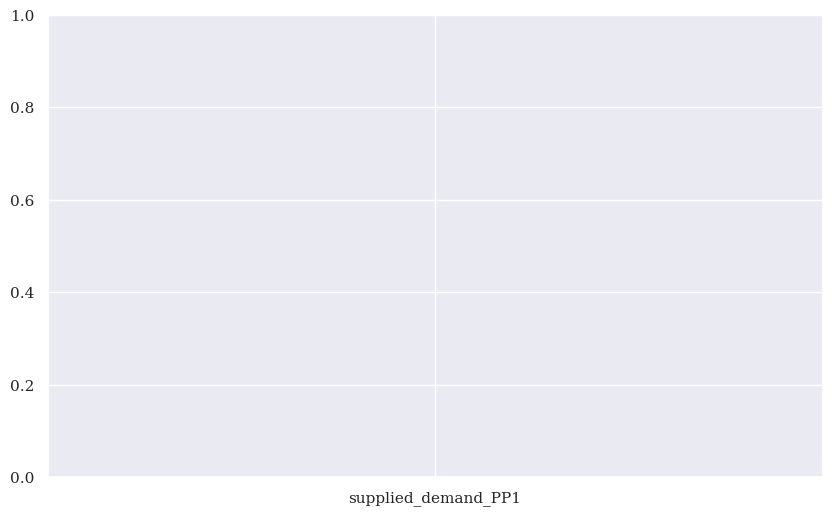

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the font to serif
sns.set(font='serif')

# Transpose the DataFrame so that rows become the axes and columns become the lines
viz_data_transposed = results_plot.T.reset_index(drop=True)

# Create the parallel axis plot with customized parameters
plt.figure(figsize=(10, 6))

# Get the x-axis data (column names)
x_data = results_plot.columns

# Iterate through each row (line) in the transposed dataframe
for index, row in viz_data_transposed.iterrows():
    # Plot the line
    plt.plot(x_data, row, label=index)
    
# Set plot title and labels
plt.title('Parallel Axis Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


